In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torchvision import models
from unet import UNet

In [ ]:
# Load the state dictionary for ResNet model
resnet_state_dict = torch.load('Models/resnet_model.pth 2')

# Remove the 'resnet.' prefix from the keys
new_resnet_state_dict = {}
for k, v in resnet_state_dict.items():
    new_key = k.replace('resnet.', '')
    new_resnet_state_dict[new_key] = v

# Modify the fully connected layer to match the saved state dictionary
resnet_model = models.resnet18()
num_ftrs = resnet_model.fc.in_features
resnet_model.fc = torch.nn.Linear(num_ftrs, 196608)  # Adjust the output size to match the saved model

# Load the modified state dictionary into the model
resnet_model.load_state_dict(new_resnet_state_dict)

/var/folders/tj/t9m9g2r12fd6s4n9vlvhyddm0000gn/T/ipykernel_42878/2325150744.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  resnet_state_dict = torch.load('Models/unet_m

RuntimeError: Error(s) in loading state_dict for ResNet:
	Missing key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer2.0.conv1.weight", "layer2.0.bn1.weight", "layer2.0.bn1.bias", "layer2.0.bn1.running_mean", "layer2.0.bn1.running_var", "layer2.0.conv2.weight", "layer2.0.bn2.weight", "layer2.0.bn2.bias", "layer2.0.bn2.running_mean", "layer2.0.bn2.running_var", "layer2.0.downsample.0.weight", "layer2.0.downsample.1.weight", "layer2.0.downsample.1.bias", "layer2.0.downsample.1.running_mean", "layer2.0.downsample.1.running_var", "layer2.1.conv1.weight", "layer2.1.bn1.weight", "layer2.1.bn1.bias", "layer2.1.bn1.running_mean", "layer2.1.bn1.running_var", "layer2.1.conv2.weight", "layer2.1.bn2.weight", "layer2.1.bn2.bias", "layer2.1.bn2.running_mean", "layer2.1.bn2.running_var", "layer3.0.conv1.weight", "layer3.0.bn1.weight", "layer3.0.bn1.bias", "layer3.0.bn1.running_mean", "layer3.0.bn1.running_var", "layer3.0.conv2.weight", "layer3.0.bn2.weight", "layer3.0.bn2.bias", "layer3.0.bn2.running_mean", "layer3.0.bn2.running_var", "layer3.0.downsample.0.weight", "layer3.0.downsample.1.weight", "layer3.0.downsample.1.bias", "layer3.0.downsample.1.running_mean", "layer3.0.downsample.1.running_var", "layer3.1.conv1.weight", "layer3.1.bn1.weight", "layer3.1.bn1.bias", "layer3.1.bn1.running_mean", "layer3.1.bn1.running_var", "layer3.1.conv2.weight", "layer3.1.bn2.weight", "layer3.1.bn2.bias", "layer3.1.bn2.running_mean", "layer3.1.bn2.running_var", "layer4.0.conv1.weight", "layer4.0.bn1.weight", "layer4.0.bn1.bias", "layer4.0.bn1.running_mean", "layer4.0.bn1.running_var", "layer4.0.conv2.weight", "layer4.0.bn2.weight", "layer4.0.bn2.bias", "layer4.0.bn2.running_mean", "layer4.0.bn2.running_var", "layer4.0.downsample.0.weight", "layer4.0.downsample.1.weight", "layer4.0.downsample.1.bias", "layer4.0.downsample.1.running_mean", "layer4.0.downsample.1.running_var", "layer4.1.conv1.weight", "layer4.1.bn1.weight", "layer4.1.bn1.bias", "layer4.1.bn1.running_mean", "layer4.1.bn1.running_var", "layer4.1.conv2.weight", "layer4.1.bn2.weight", "layer4.1.bn2.bias", "layer4.1.bn2.running_mean", "layer4.1.bn2.running_var", "fc.weight", "fc.bias". 
	Unexpected key(s) in state_dict: "encoder.0.weight", "encoder.0.bias", "encoder.2.weight", "encoder.2.bias", "bottleneck.0.weight", "bottleneck.0.bias", "bottleneck.2.weight", "bottleneck.2.bias", "decoder.0.weight", "decoder.0.bias", "decoder.2.weight", "decoder.2.bias", "decoder.4.weight", "decoder.4.bias", "decoder.5.weight", "decoder.5.bias". 

In [ ]:
# Load the state dictionary for GAN model
gan_state_dict = torch.load('Models/gan_model.pth')

# Remove the 'generator.' prefix from the keys
new_gan_state_dict = {}
for k, v in gan_state_dict.items():
    if k.startswith('generator.'):
        new_key = k.replace('generator.', '')
        new_gan_state_dict[new_key] = v

# Modify the fully connected layer to match the saved state dictionary
gan_model = models.resnet18()
num_ftrs = gan_model.fc.in_features
gan_model.fc = torch.nn.Linear(num_ftrs, 196608)  # Adjust the output size to match the saved model

# Load the modified state dictionary into the model
gan_model.load_state_dict(new_gan_state_dict, strict=False)

/var/folders/tj/t9m9g2r12fd6s4n9vlvhyddm0000gn/T/ipykernel_90273/1565280836.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gan_state_dict = torch.load('Models/gan_model

_IncompatibleKeys(missing_keys=['conv1.weight', 'bn1.weight', 'bn1.bias', 'bn1.running_mean', 'bn1.running_var', 'layer1.0.conv1.weight', 'layer1.0.bn1.weight', 'layer1.0.bn1.bias', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.conv2.weight', 'layer1.0.bn2.weight', 'layer1.0.bn2.bias', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.1.conv1.weight', 'layer1.1.bn1.weight', 'layer1.1.bn1.bias', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.conv2.weight', 'layer1.1.bn2.weight', 'layer1.1.bn2.bias', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer2.0.conv1.weight', 'layer2.0.bn1.weight', 'layer2.0.bn1.bias', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var', 'layer2.0.conv2.weight', 'layer2.0.bn2.weight', 'layer2.0.bn2.bias', 'layer2.0.bn2.running_mean', 'layer2.0.bn2.running_var', 'layer2.0.downsample.0.weight', 'layer2.0.downsample.1.weight', 'layer2.0.downsample.1.bias', 'layer2.0.downsample.1.running_mean',

In [ ]:
# Set models to evaluation mode
resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
gan_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

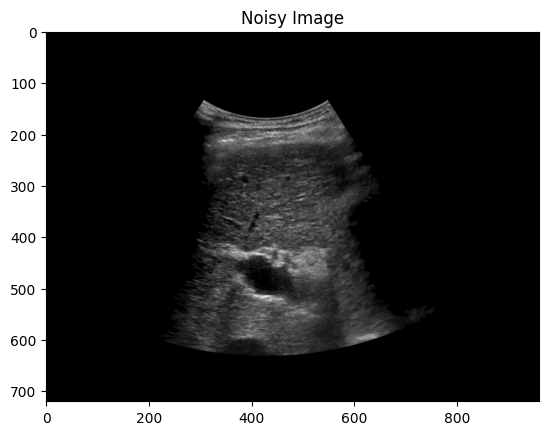

In [ ]:
# Load the noisy image
noisy_image_path = "Processed Images/1-1.png"
noisy_image = plt.imread(noisy_image_path)

# Display the noisy image
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.show()

In [ ]:
# Print the initial shape of noisy_image
print("Initial shape of noisy_image:", noisy_image.shape)

# Remove unnecessary dimensions if any
noisy_image = np.squeeze(noisy_image)
print("Shape after squeezing:", noisy_image.shape)

# Ensure noisy_image has 3 dimensions (height, width, channels)
if len(noisy_image.shape) == 2:
    # If noisy_image is 2D (height, width), add a channel dimension
    noisy_image = np.expand_dims(noisy_image, axis=-1)
    print("Added channel dimension:", noisy_image.shape)

assert len(noisy_image.shape) == 3, f"noisy_image should have 3 dimensions (height, width, channels), but got {noisy_image.shape}"

# If the image has only 1 channel, convert it to 3 channels by duplicating the single channel
if noisy_image.shape[2] == 1:
    noisy_image = np.repeat(noisy_image, 3, axis=2)
    print("Converted to 3 channels:", noisy_image.shape)

# Expand dimensions to create a batch dimension and move channels to the second dimension
noisy_image = np.expand_dims(noisy_image, axis=0)  # Add batch dimension
print("Added batch dimension:", noisy_image.shape)

noisy_image = np.transpose(noisy_image, (0, 3, 1, 2))  # Change shape to [batch_size, channels, height, width]
print("Transposed shape:", noisy_image.shape)

# Convert to a torch tensor
noisy_image = torch.tensor(noisy_image).float()
print("Converted to tensor:", noisy_image.shape)

Initial shape of noisy_image: (720, 960)
Shape after squeezing: (720, 960)
Added channel dimension: (720, 960, 1)
Converted to 3 channels: (720, 960, 3)
Added batch dimension: (1, 720, 960, 3)
Transposed shape: (1, 3, 720, 960)
Converted to tensor: torch.Size([1, 3, 720, 960])


In [ ]:
# Run the noisy image through the models
with torch.no_grad():
    resnet_output = resnet_model(noisy_image)
    gan_output = gan_model(noisy_image)

In [ ]:
# Print the shapes of the model outputs
print("ResNet Output Shape:", resnet_output.shape)
print("GAN Output Shape:", gan_output.shape)

ResNet Output Shape: torch.Size([1, 196608])
GAN Output Shape: torch.Size([1, 196608])


In [ ]:
# Reshape the outputs to [height, width, channels]
# The output size 196608 corresponds to 256x256x3, so reshape accordingly

height, width, channels = 256, 256, 3  # Expected output shape for images

# Reshape the outputs into [height, width, channels] 
resnet_output = resnet_output.reshape((height, width, channels)).detach().cpu().numpy()
gan_output = gan_output.reshape((height, width, channels)).detach().cpu().numpy()

In [ ]:
# Normalize the output images for display (if necessary, depending on the range of values)
resnet_output = (resnet_output - np.min(resnet_output)) / (np.max(resnet_output) - np.min(resnet_output))
gan_output = (gan_output - np.min(gan_output)) / (np.max(gan_output) - np.min(gan_output))

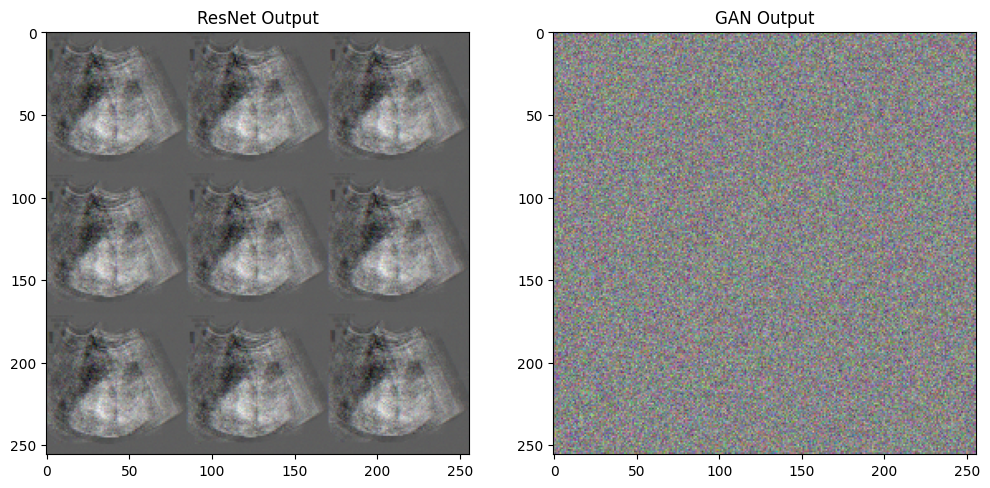

In [ ]:
# Display the output images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(resnet_output)
plt.title("ResNet Output")
plt.subplot(1, 2, 2)
plt.imshow(gan_output)
plt.title("GAN Output")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.44012594..0.75265735].


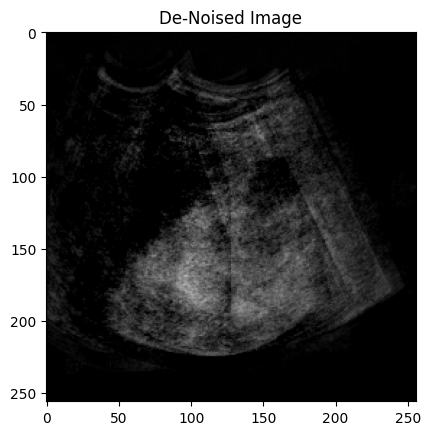

In [ ]:
# Define a function to process and combine outputs
def generate_single_image(noisy_image):
    with torch.no_grad():
        # Pass the image through the ResNet model
        resnet_output = resnet_model(noisy_image)
        resnet_output = resnet_output.view(-1, 3, 256, 256)  # Ensure correct shape
        resnet_image = resnet_output.mean(dim=0)  # Aggregate into one image
        
        # Pass the same image through the GAN model
        gan_output = gan_model(noisy_image)
        gan_output = gan_output.view(-1, 3, 256, 256)  # Ensure correct shape
        gan_image = gan_output.mean(dim=0)  # Aggregate into one image
        
        # Combine outputs (e.g., average or weighted sum)
        combined_image = 0.5 * resnet_image + 0.5 * gan_image  # Averaging the results
        combined_image = torch.clamp(combined_image, 0, 1)  # Ensure values are in [0, 1]

        return resnet_image

output_image = generate_single_image(noisy_image)

# Convert to numpy for visualization
output_image_np = output_image.permute(1, 2, 0).cpu().numpy()  # CHW to HWC
plt.imshow(output_image_np)
plt.title("De-Noised Image")
plt.show()


/var/folders/tj/t9m9g2r12fd6s4n9vlvhyddm0000gn/T/ipykernel_25806/2546376751.py:53: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("Models/une

PSNR for noisy_2.png: 13.212806423402


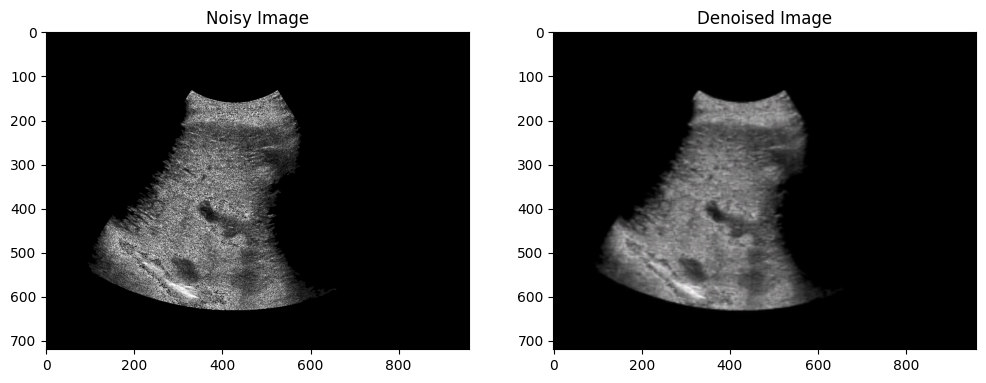

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.046933524..0.84401405].


PSNR for 1-6_speckle_noise.png: 10.306206501154104


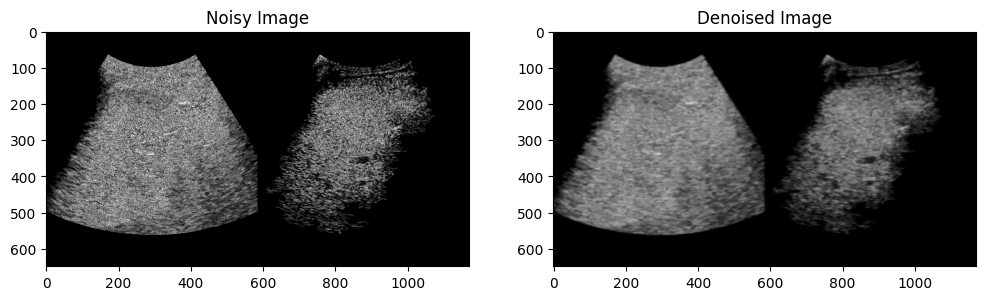

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.034222465..0.7902853].


PSNR for noisy_1.png: 14.08571897539402


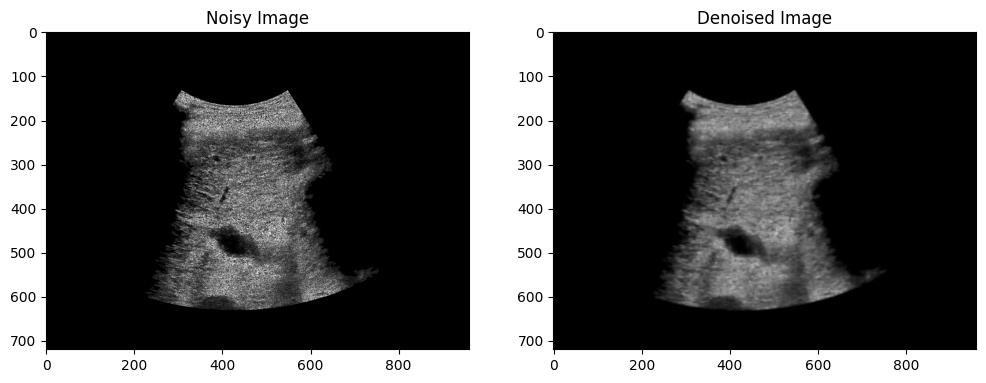

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.028726013..0.9998815].


PSNR for noisy_4.png: 13.21204585627165


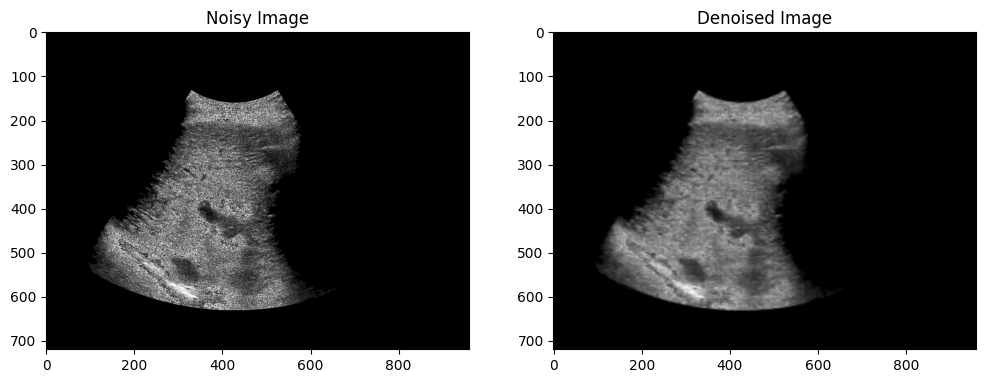

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.037351955..0.76600367].


PSNR for noisy_5.png: 11.816218005010882


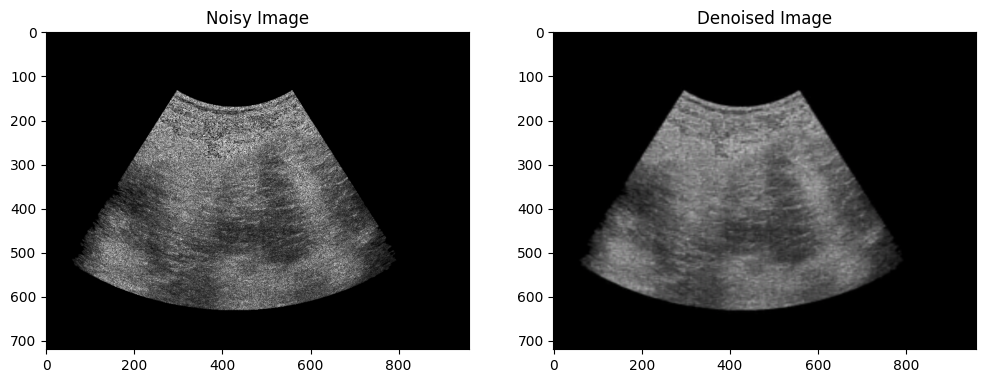

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.054768726..0.7461977].


PSNR for noisy_7.png: 14.27365381725392


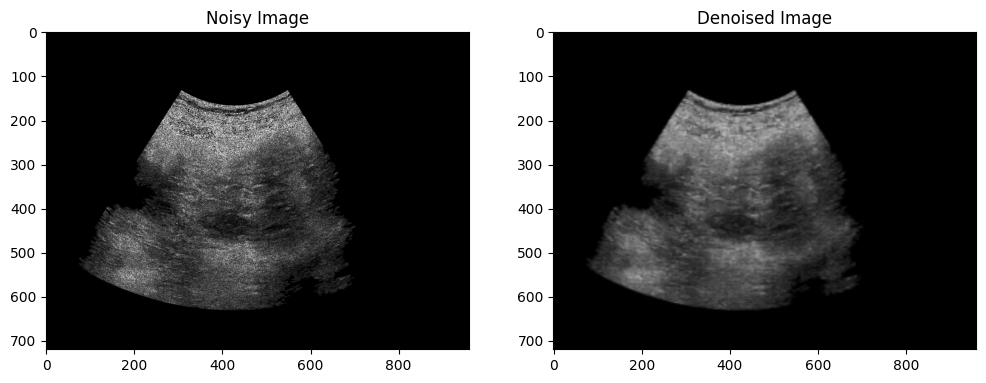

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.026520422..0.9960803].


PSNR for 1-2_speckle_noise.png: 13.221769508349324


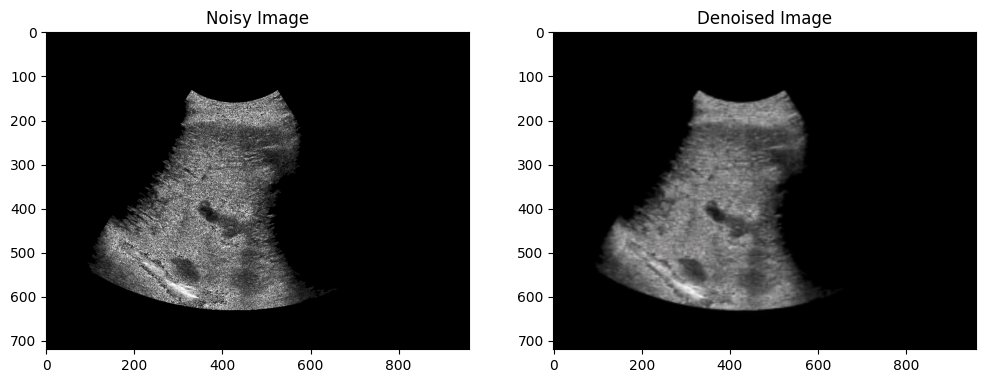

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.033416443..0.84035707].


PSNR for noisy_6.png: 14.552710811443408


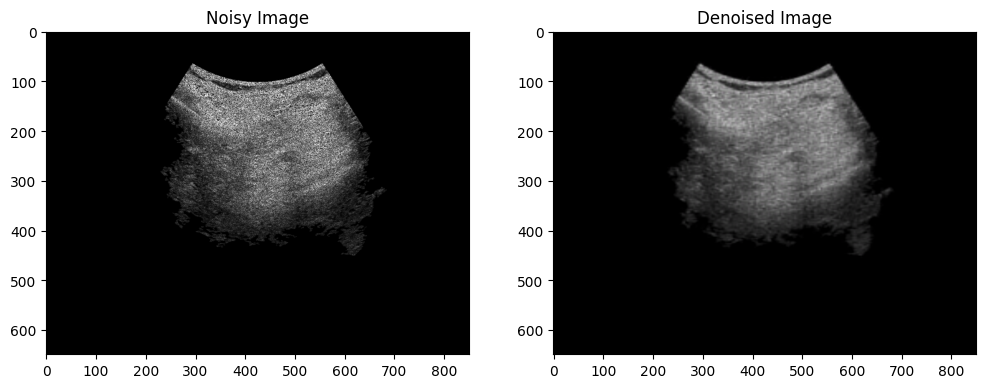

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.03412766..0.7545486].


PSNR for 1-1_speckle_noise.png: 14.078073949382187


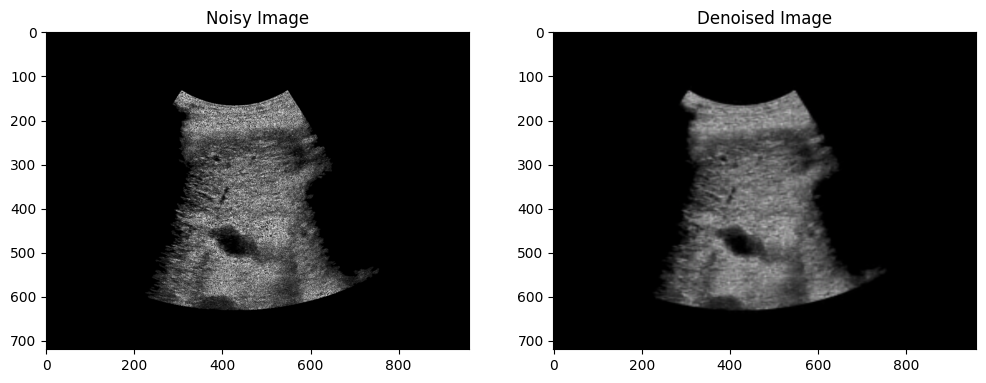

Average PSNR: 13.19546709418461


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image
from skimage.transform import resize
from skimage.metrics import peak_signal_noise_ratio

# Define the U-Net model 
class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=3):
        super(UNet, self).__init__()
        
        # Contracting path (Encoder)
        self.encoder = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Bottleneck
        self.bottleneck = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        # Expanding path (Decoder)
        self.decoder = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(64, 64, kernel_size=2, stride=2),
            nn.ConvTranspose2d(64, out_channels, kernel_size=2, stride=2)
        )

    def forward(self, x):
        x1 = self.encoder(x)
        x2 = self.bottleneck(x1)
        x3 = self.decoder(x2)
        x3_resized = F.interpolate(x3, size=x.shape[2:], mode='bilinear', align_corners=False)
        return x3_resized

# Load the saved model
model = UNet()
model.load_state_dict(torch.load("Models/unet_model.pth"))
model.eval()

# Function to load and preprocess the image
def load_image(path):
    img = Image.open(path).convert('RGB')
    img_array = np.array(img)
    max_val = np.max(img_array)
    if max_val == 0:
        max_val = 1
    normalized_img_array = img_array / max_val
    new_size = (256, 256)
    resized_img = resize(normalized_img_array, new_size, anti_aliasing=True)
    img = torch.tensor(resized_img, dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)
    return img, img_array.shape

# Load the test data
image_dir = "Noisy Images"
psnr_values = []

# Iterate over all images in the directory
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        test_image_path = os.path.join(image_dir, filename)
        test_image, original_shape = load_image(test_image_path)

        # Pass the test data through the model
        with torch.no_grad():
            output = model(test_image)

        # Convert the output to a numpy array and resize to original shape
        output_image = output.squeeze().permute(1, 2, 0).numpy()
        output_image_resized = resize(output_image, original_shape[:2], anti_aliasing=True)

        # Ensure both images have the same dimensions
        noisy_image_array = np.array(Image.open(test_image_path).convert('RGB'))
        if noisy_image_array.shape != output_image_resized.shape:
            raise ValueError(f"Shape mismatch for image: {filename}")

        # Calculate PSNR
        psnr_value = peak_signal_noise_ratio(noisy_image_array, output_image_resized)
        psnr_values.append(psnr_value)
        print(f"PSNR for {filename}: {psnr_value}")

        # Visualize the output
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.title("Noisy Image")
        plt.imshow(noisy_image_array)
        plt.subplot(1, 2, 2)
        plt.title("Denoised Image")
        plt.imshow(output_image_resized)
        plt.show()

# Calculate the average PSNR
average_psnr = np.mean(psnr_values)
print(f"Average PSNR: {average_psnr}")